In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras as ks
import os
import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
logging.getLogger('absl').setLevel(logging.ERROR)

In [23]:
x_original = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y_original = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

x = tf.identity(x_original)
y = tf.identity(y_original)

x_original, y_original

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

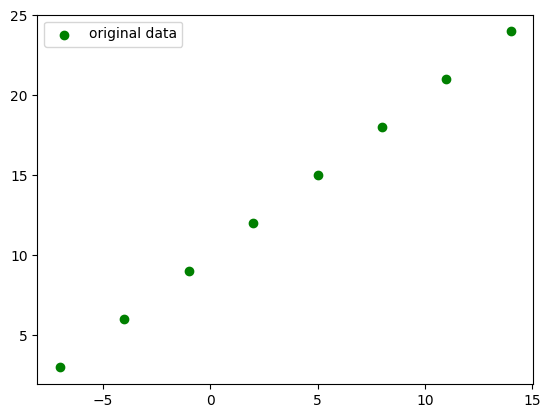

In [24]:
plt.scatter(x=x_original, y=y_original, c='green', label='original data')
plt.legend()

In [27]:
div = int(len(x)*0.7)

x_train = x[0:div]
y_train = y[0:div]

x_test = x[div:]
y_test = y[div:]

div, x_train, y_train, x_test, y_test

(5,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.], dtype=float32)>,
 <tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15.], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([18., 21., 24.], dtype=float32)>)

In [46]:
tf.random.set_seed(13)

model1 = ks.Sequential()
model1.add(ks.layers.Input(shape=(1,)))
model1.add(ks.layers.Dense(10))
model1.add(ks.layers.Dense(10))
model1.add(ks.layers.Dense(1))

model1.compile(loss=ks.losses.mae,
               optimizer=ks.optimizers.SGD(learning_rate=0.01),
               metrics=['mae'])
model1.fit(x_train,y_train,epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 251ms/step - loss: 9.1875 - mse: 96.2927
Epoch 2/20
1/1 [==============================] - 0s 12ms/step - loss: 9.0969 - mse: 96.1874
Epoch 3/20
1/1 [==============================] - 0s 10ms/step - loss: 9.0069 - mse: 96.1913
Epoch 4/20
1/1 [==============================] - 0s 11ms/step - loss: 8.9171 - mse: 96.3025
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 8.8274 - mse: 96.5206
Epoch 6/20
1/1 [==============================] - 0s 9ms/step - loss: 8.7374 - mse: 96.8463
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 8.6469 - mse: 97.2815
Epoch 8/20
1/1 [==============================] - 0s 11ms/step - loss: 8.5556 - mse: 97.8298
Epoch 9/20
1/1 [==============================] - 0s 10ms/step - loss: 8.4632 - mse: 98.4960
Epoch 10/20
1/1 [==============================] - 0s 10ms/step - loss: 8.3695 - mse: 99.2861
Epoch 11/20
1/1 [==============================] - 0s 10ms/step - los

In [47]:
model1.evaluate(x=x_test, y=y_test)

1/1 [==============================] - 0s 98ms/step - loss: 23.2029 - mse: 548.0419


[23.202871322631836, 548.0418701171875]

In [48]:
print(x_test)
print(y_test)
model1.predict(x_test)

tf.Tensor([ 8. 11. 14.], shape=(3,), dtype=float32)
tf.Tensor([18. 21. 24.], shape=(3,), dtype=float32)
1/1 [==============================] - 0s 36ms/step


array([[-1.3945848],
       [-2.2028701],
       [-3.0111544]], dtype=float32)